In [178]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [179]:
def weber(i):
    if i <= 88:
        return 20 - 12 * i / 88
    elif i <= 138:
        return 0.002 * np.power(i - 88, 2)
    else:
        return 7 * (i - 138) / 117 + 13

In [180]:
# Reading image
img_path = "../../images/"
img_name = "face7.jpg"
img = cv.imread(img_path + img_name, cv.IMREAD_GRAYSCALE)
n_rows, n_cols = img.shape[:2]

In [181]:
cv.imwrite(img_path + img_name.rpartition('.')[0] + "_grayscale.jpg", img)

True

In [182]:
# Initial conditions
n = 0  # First class number
i_n = 0  # Grayscale level
i_w = weber(i_n)
i_min = np.min(img)
i_max = np.max(img)
print(i_min, i_max)

4 231


In [183]:
new_img = np.zeros_like(img)
seg_val = []  # Intensity - segment boundaries

# Calculate the first intensity boundary
while i_min > (i_w + i_n):
    i_n += (i_w + 1)
    i_w = weber(i_n)

while i_max > (i_w + i_n):
    new_img[(img >= i_n) & (img <= i_n + i_w)] = i_n
    seg_val.append(i_n)
    i_n += (i_w + 1)
    n += 1
    i_w = weber(i_n)
new_img = np.clip(new_img, 0, 255).astype(np.uint8)

In [184]:
# Number of segmented layers
print(n)

36


In [185]:
# Segments boundaries
seg_val = np.uint8(seg_val)
print(seg_val)

[  0  21  39  54  68  80  90  91  92  93  94  95  96  97  98  99 101 102
 104 105 107 108 110 112 115 117 120 123 126 130 135 140 155 170 186 202]


True

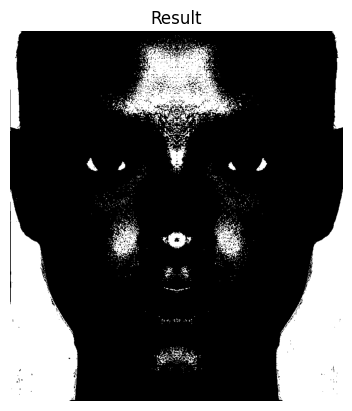

In [191]:
# Show q-segment
q = 36
seg_q = np.zeros_like(new_img)
seg_q[new_img == seg_val[q - 1]] = 255
plt.imshow(seg_q, cmap='gray', vmin=0, vmax=255)
plt.title("Result")
plt.axis('off')
# Save result
cv.imwrite(img_path + img_name.rpartition('.')[0] + "_" + str(q) + ".jpg", seg_q)

True

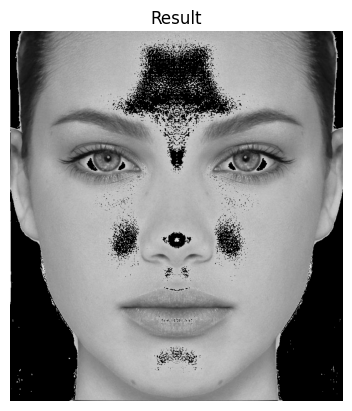

In [195]:
# Show [q1, q1] interval of segments
q1 = 1
q2 = 35
seg_int = np.zeros_like(new_img)
seg_int[(new_img >= seg_val[q1 - 1]) & (new_img <= seg_val[q2 - 1])] = img[(new_img >= seg_val[q1 - 1]) & (new_img <= seg_val[q2 - 1])]
plt.imshow(seg_int, cmap='gray', vmin=0, vmax=255)
plt.title("Result")
plt.axis('off')

# Save result
cv.imwrite(img_path + img_name.rpartition('.')[0] + "_" + str(q1) + '_' + str(q2) + ".jpg", seg_int)

True

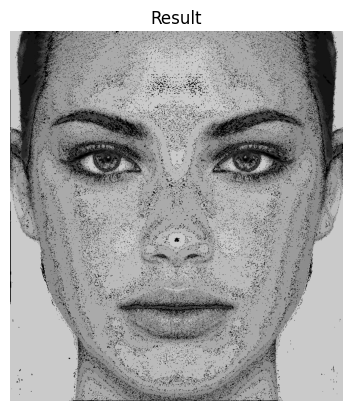

In [188]:
# Show all segments image
plt.imshow(new_img, cmap='gray', vmin=0, vmax=255)
plt.title("Result")
plt.axis('off')
# Save image
cv.imwrite(img_path + img_name.rpartition('.')[0] + "_weber.jpg", new_img)